In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import graphviz.backend as be
from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import shap
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [2]:
data=pd.read_csv("C:/Users/biley/Downloads/archive (37)/Loan_default.csv")

In [3]:
data

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [4]:
data.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [5]:
data.dtypes

LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object

In [6]:
data['Default'].value_counts()

0    225694
1     29653
Name: Default, dtype: int64

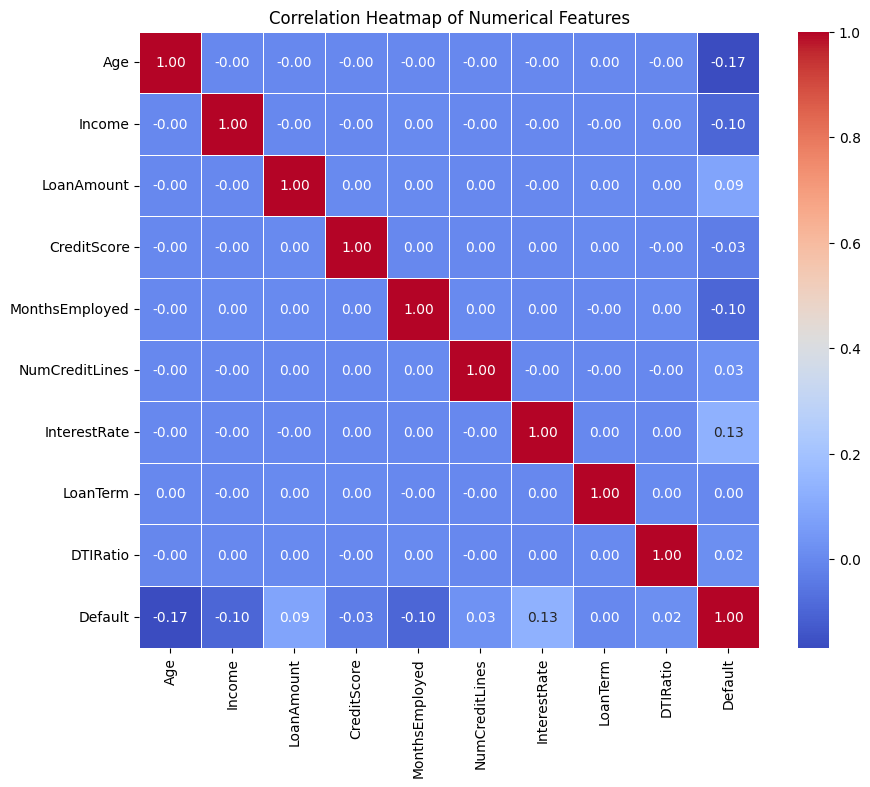

In [7]:
numerical_features = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [8]:
data=data.drop(['LoanID'],axis=1)

In [9]:
data

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [10]:
data['Education'].unique()

array(["Bachelor's", "Master's", 'High School', 'PhD'], dtype=object)

In [11]:
data['EmploymentType'].unique()

array(['Full-time', 'Unemployed', 'Self-employed', 'Part-time'],
      dtype=object)

In [12]:
data['MaritalStatus'].unique()

array(['Divorced', 'Married', 'Single'], dtype=object)

In [13]:
data['HasMortgage'].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
data['HasDependents'].unique()

array(['Yes', 'No'], dtype=object)

In [15]:
data['LoanPurpose'].unique()

array(['Other', 'Auto', 'Business', 'Home', 'Education'], dtype=object)

In [16]:
data['HasCoSigner'].unique()

array(['Yes', 'No'], dtype=object)

In [17]:
label_encoder = LabelEncoder()
data['HasMortgage'] = label_encoder.fit_transform(data['HasMortgage'])

In [18]:
label_encoder = LabelEncoder()
data['HasDependents'] = label_encoder.fit_transform(data['HasDependents'])

In [19]:
label_encoder = LabelEncoder()
data['LoanPurpose'] = label_encoder.fit_transform(data['LoanPurpose'])

In [20]:
label_encoder = LabelEncoder()
data['HasCoSigner'] = label_encoder.fit_transform(data['HasCoSigner'])

In [21]:
label_encoder = LabelEncoder()
data['Education'] = label_encoder.fit_transform(data['Education'])

In [22]:
label_encoder = LabelEncoder()
data['EmploymentType'] = label_encoder.fit_transform(data['EmploymentType'])

In [23]:
label_encoder = LabelEncoder()
data['MaritalStatus'] = label_encoder.fit_transform(data['MaritalStatus'])

In [24]:
data

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,0,0,1,0,0,4,0,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,1,1,0,0,0,3,0,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,1,2,1,1,1,0,1,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,1,1,2,1,1,4,0,0


In [25]:
data.dtypes

Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education           int32
EmploymentType      int32
MaritalStatus       int32
HasMortgage         int32
HasDependents       int32
LoanPurpose         int32
HasCoSigner         int32
Default             int64
dtype: object

In [26]:
X=data.drop('Default',axis=1)
y=data['Default']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
feature_names = X_train.columns

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying Different Models

# Logistic regression

In [30]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [31]:
y_pred = model.predict(X_test_scaled)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [33]:
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_rep)
print(conf_matrix)

Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.62      0.03      0.06      5900

    accuracy                           0.89     51070
   macro avg       0.75      0.51      0.50     51070
weighted avg       0.86      0.89      0.84     51070

[[45058   112]
 [ 5717   183]]


In [34]:
y_probs = model.predict_proba(X_test_scaled)

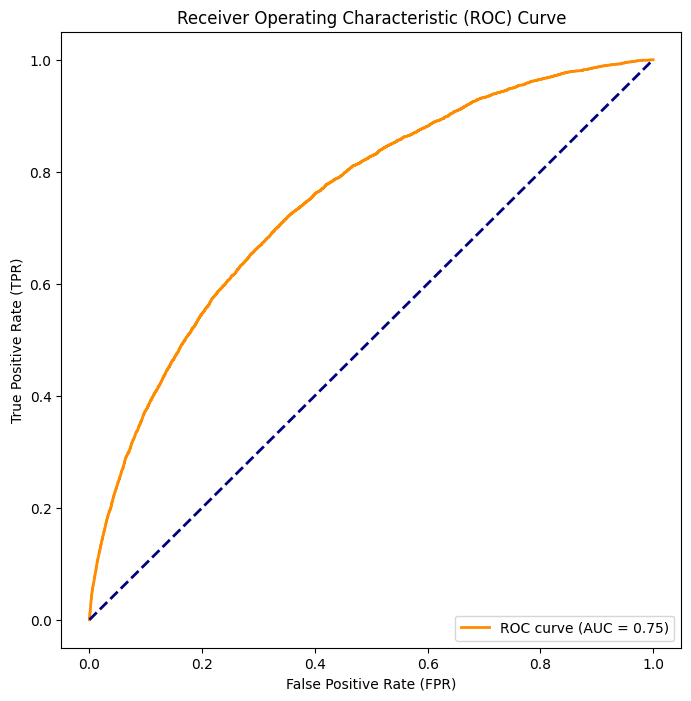

AUC: 0.7497845877907566


In [35]:
fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_auc)

Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/500 [00:00<?, ?it/s]

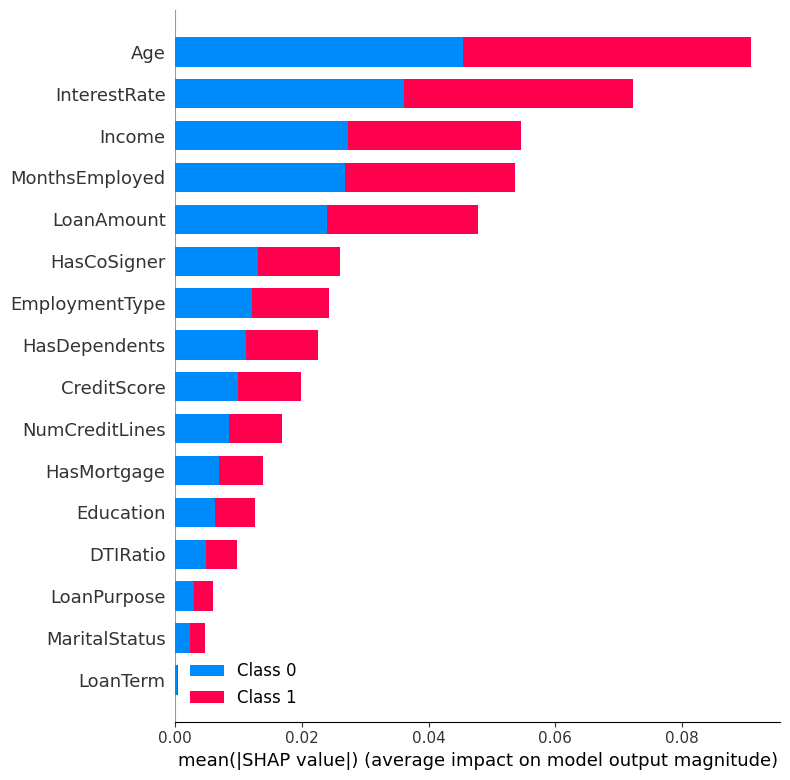

In [36]:
background_summary = shap.sample(X_train_scaled, 500)  
explainer = shap.KernelExplainer(model.predict_proba, background_summary)
shap_values = explainer.shap_values(X_test_scaled[:500, :])
shap.summary_plot(shap_values, X_test_scaled[:500, :], feature_names=X_train.columns)

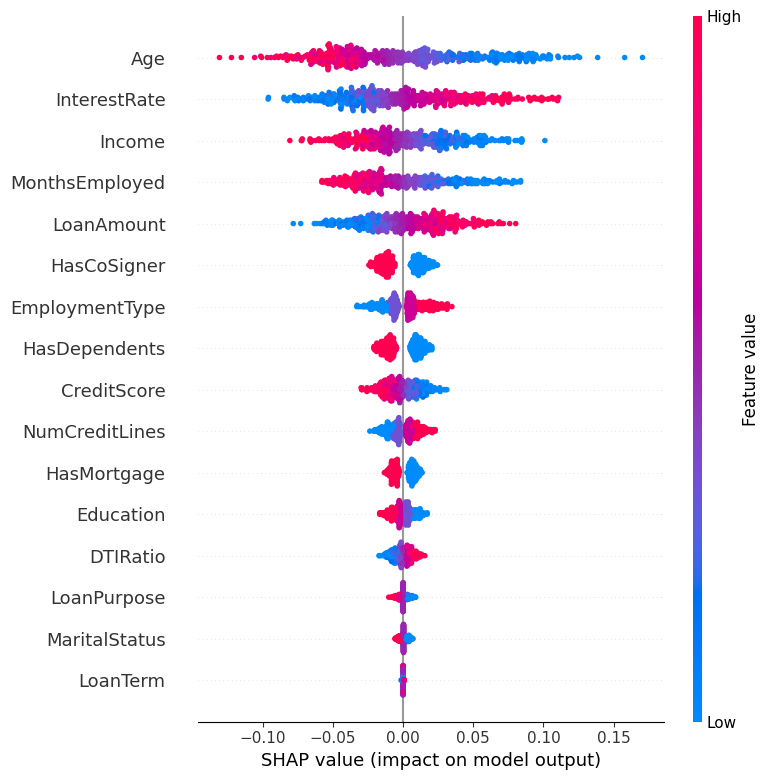

In [37]:
shap.summary_plot(shap_values[1], X_test_scaled[:500, :], feature_names=X_train.columns)

# Decision Tree

In [38]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
y_pred = decision_tree_model.predict(X_test_scaled)

In [40]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [41]:
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.8024672018797728
Confusion Matrix:
[[39618  5552]
 [ 4536  1364]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     45170
           1       0.20      0.23      0.21      5900

    accuracy                           0.80     51070
   macro avg       0.55      0.55      0.55     51070
weighted avg       0.82      0.80      0.81     51070



In [42]:
y_probs = decision_tree_model.predict_proba(X_test_scaled)

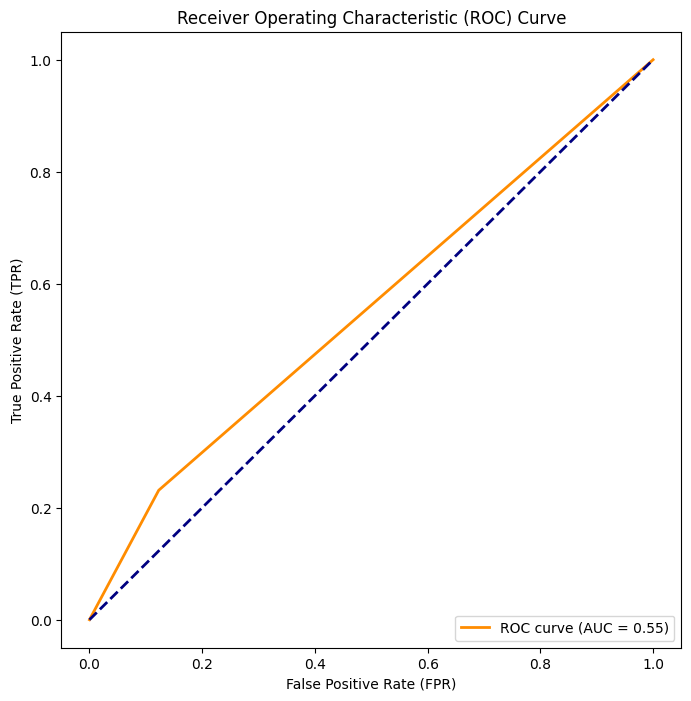

AUC: 0.5541365012776591


In [43]:
fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_auc)

# Random Forest

In [44]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
y_pred = random_forest_model.predict(X_test_scaled)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [46]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [47]:
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.8634814959859017
Confusion Matrix:
[[43939  1231]
 [ 5741   159]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.93     45170
           1       0.11      0.03      0.04      5900

    accuracy                           0.86     51070
   macro avg       0.50      0.50      0.49     51070
weighted avg       0.80      0.86      0.82     51070



In [48]:
y_probs = random_forest_model.predict_proba(X_test_scaled)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


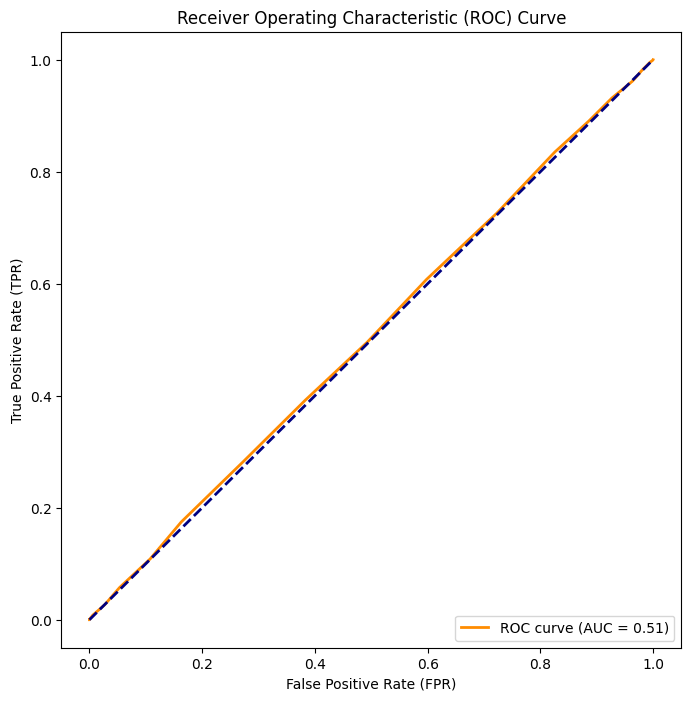

AUC: 0.5062024179840376


In [49]:
fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_auc)

# KNN

In [50]:
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)

In [51]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [52]:
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.8756804386136675
Confusion Matrix:
[[44303   867]
 [ 5482   418]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     45170
           1       0.33      0.07      0.12      5900

    accuracy                           0.88     51070
   macro avg       0.61      0.53      0.52     51070
weighted avg       0.82      0.88      0.84     51070



In [53]:
y_probs = knn_model.predict_proba(X_test_scaled)

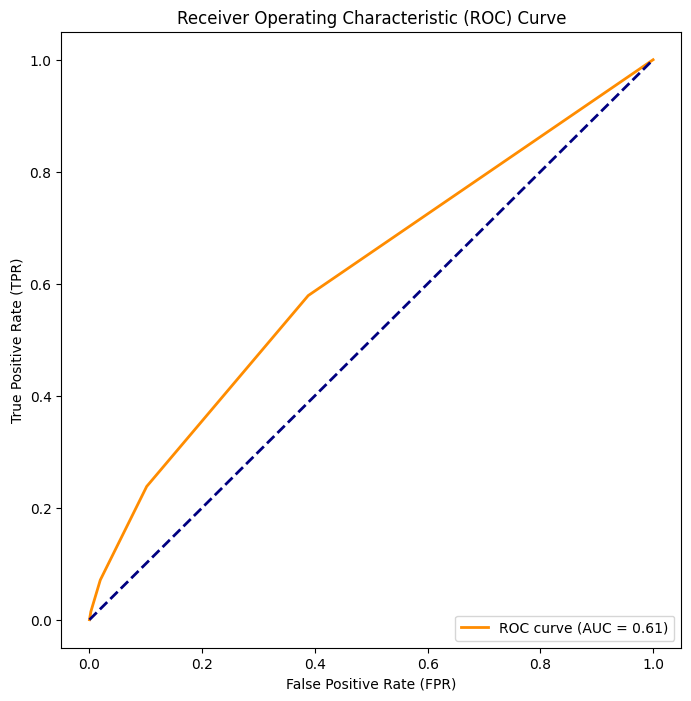

AUC: 0.6135275156377227


In [54]:
fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_auc)

# XGBoost

In [55]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [56]:
y_pred = xgb_model.predict(X_test_scaled)

In [57]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.8859800274133542
Confusion Matrix:
[[44780   390]
 [ 5433   467]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     45170
           1       0.54      0.08      0.14      5900

    accuracy                           0.89     51070
   macro avg       0.72      0.54      0.54     51070
weighted avg       0.85      0.89      0.85     51070



In [58]:
y_probs = xgb_model.predict_proba(X_test_scaled)

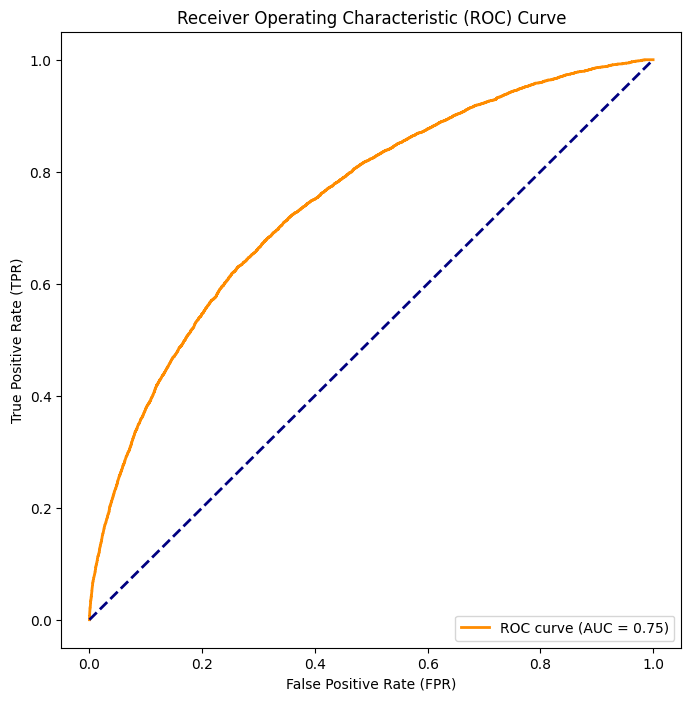

AUC: 0.7470365267933194


In [59]:
fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_auc)